# Random Forest
>**`Random forest`** 는 **`Decision Tree`** 모델의 **모형 결합(ensemble)방법론**  

## ensemble(앙상블)
> **복수의 예측 모형을 결합**하여 더 나은 성능의 예측을 하려는 시도이다.  
단일 모형을 사용할 때 보다 **성능 분산이 감소**하고, 즉 **과적합을 방지**한다.  
개별 모형이 성능이 안좋을 경우에는 결합 모형의 성능이 더 향상된다.  
앙상블 방법론에는 **배깅**, **부스팅**이 있다.

<img src="./image/30.gif">

## bagging(배깅)
> 개별 모델을 병렬로 구성하여 모델을 결합하는 방법론이다.  
기존 학습데이터에서 **복원 추출**로 여러개의 sub sample 데이터셋을 만든 후 각 데이터셋을 병렬 구성 모델에 학습시켜 서로 다른 결과를 얻는다.  
개별 모델의 결과값을 voting(투표법) 혹은 평균법을 사용하여 개별 모델 결과를 바탕으로 최종 추정치를 얻는다. 
<img src="./image/31.png">

#### Random Forest Bootstrap Aggregating
> **`Random forest`** 는 대표적인 배깅 방법론으로 weak model로 **`Decision Tree`** 를 사용한다.  
배깅 사용 시 추가적으로 부트스트랩 방법론을 추가하여 모델 학습에 사용한다.  
부트스트랩은 복원 추출 된 sub sample 데이터셋 생성 시 랜덤 샘플 및 feature를 선택하여 모델 학습에 사용한다.

<img src="./image/32.jpeg">

## Ramdom Forest 실습

In [1]:
# 모델 import
from sklearn.ensemble import RandomForestRegressor

### 과적합 방지를 위한 모델링 파라메터  
> - **n_estimators** : 사용 할 트리 모델 갯수  
- **max_depth** : 트리의 최대 깊이

In [2]:
# 필요모듈 import
import pandas as pd

In [3]:
# 데이터셋 import 
df = pd.read_csv('./data/boston.csv')

In [4]:
# 타겟 데이터 분할
y = df['y']
X = df.drop('y', axis=1)

In [5]:
# 학습 데이터 분할
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [6]:
# 모델 생성
rfr = RandomForestRegressor(random_state=42)

In [7]:
# 모델 학습
rfr.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [8]:
# 모델 예측
pred = rfr.predict(X_test)

In [10]:
# 평가
from sklearn.metrics import r2_score, mean_squared_error
print(r2_score(y_test, pred))
print(mean_squared_error(y_test, pred, squared=False))

0.8708997131330258
3.1015579977098433


<BarContainer object of 13 artists>

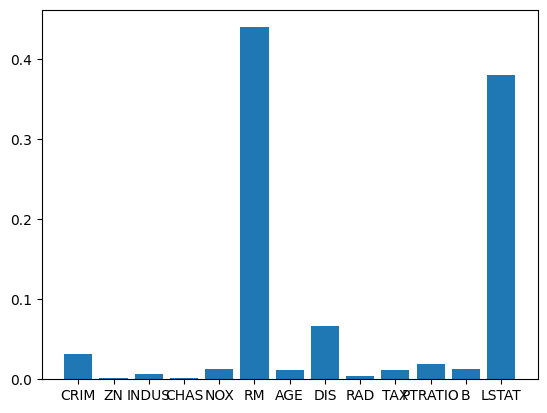

In [11]:
import matplotlib.pyplot as plt
plt.bar(X_train.columns, rfr.feature_importances_)